In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [22]:
PATH = 'data/tree_leaves/'
sz=256
arch=resnet34
# bs=64

In [5]:
os.listdir(PATH)

['valid', 'models', 'train', 'tmp']

In [6]:
os.listdir(f'{PATH}valid')

['oak_tree_leaves', 'maple_tree_leaves']

In [7]:
# remove .DS_Store: find . -name '*.DS_Store' -type f -delete 
files = os.listdir(f'{PATH}valid/oak_tree_leaves')[:5]
files

['oak_tree_leaves.24.jpg',
 'oak_tree_leaves.36.jpg',
 'oak_tree_leaves.53.jpg',
 'oak_tree_leaves.45.jpg',
 'oak_tree_leaves.79.jpg']

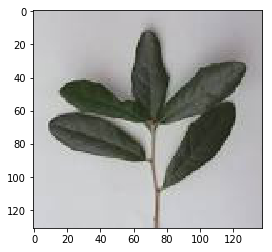

In [8]:
img = plt.imread(f'{PATH}valid/oak_tree_leaves/{files[0]}')
plt.imshow(img)

In [9]:
img.shape

(131, 138, 3)

In [10]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [17]:
# find LR
learn = ConvLearner.pretrained(arch, data, precompute=True)


In [18]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   accuracy                
    0      0.848624   0.476276   0.736842  



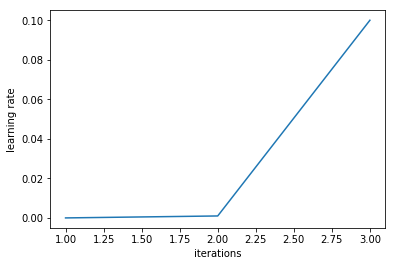

In [19]:
learn.sched.plot_lr()

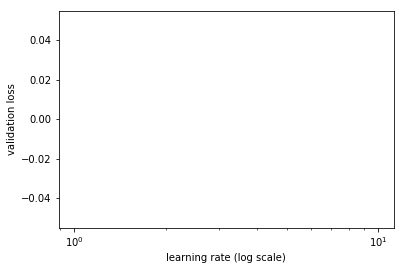

In [20]:
learn.sched.plot()

In [23]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, n_cycle=4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                
    0      0.895126   0.756806   0.5       
    1      0.787694   0.604301   0.657895               
    2      0.669836   0.573765   0.684211                
    3      0.626433   0.505646   0.710526                
    4      0.554189   0.48646    0.789474                
    5      0.510145   0.477455   0.789474               
    6      0.484134   0.475187   0.763158                
    7      0.464056   0.453639   0.815789                
    8      0.430203   0.451611   0.842105                
    9      0.397714   0.449888   0.815789                
    10     0.371761   0.452038   0.815789                
    11     0.352811   0.461318   0.815789                
    12     0.334122   0.450323   0.842105                
    13     0.32102    0.437536   0.842105                
    14     0.302741   0.442488   0.842105                



[0.4424878656864166, 0.8421052694320679]